In [97]:
# Deliveroo Analytics - Google Colab Implementation
"""
Complete Deliveroo Data Analytics for Google Colab
Advanced analytics for all 8 business questions with machine learning and statistical modeling
Execute each cell sequentially in Google Colab
"""

# ============================================================================
# CELL 1: Install Required Libraries and Setup
# ============================================================================

!pip install plotly scikit-learn scipy pandas numpy matplotlib seaborn -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Advanced analytics libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, classification_report
from sklearn.linear_model import LogisticRegression
from scipy import stats
from scipy.optimize import minimize
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries installed and imported successfully!")

# ============================================================================
# CELL 2: Data Generation (Run this if you need to recreate datasets)
# ============================================================================

def generate_synthetic_data():
    """Generate synthetic datasets for Deliveroo analytics"""
    np.random.seed(42)

    # Orders Dataset
    orders = pd.DataFrame({
        'order_id': range(1000, 1230),
        'customer_id': np.random.randint(100, 500, size=230),
        'restaurant_id': np.random.randint(1, 21, size=230),
        'rider_id': np.random.randint(1, 51, size=230),
        'city_id': np.random.choice([101, 102, 103], size=230),
        'order_date': [datetime.now() - timedelta(days=np.random.randint(0, 60)) for _ in range(230)],
        'order_value': np.round(np.random.lognormal(3.2, 0.5, size=230), 2),
        'delivery_fee': np.round(np.where(np.random.rand(230) > 0.5, 3.99, 5.99), 2),
        'tip_amount': np.round(np.random.exponential(2, size=230), 2),
        'delivery_time_minutes': np.random.normal(35, 8, size=230),
        'rating': np.random.choice([1,2,3,4,5], size=230, p=[0.05, 0.1, 0.2, 0.35, 0.3]),
        'distance_km': np.round(np.random.exponential(3, size=230), 1)
    })

    # Customers Dataset
    customers = pd.DataFrame({
        'customer_id': range(100, 500),
        'acquisition_channel': np.random.choice(['Organic', 'Paid Ads', 'Referral'], size=400, p=[0.5, 0.3, 0.2]),
        'ltv': np.round(np.random.exponential(200, size=400), 2),
        'churn_probability': np.random.beta(2, 5, size=400),
        'preferred_cuisine': np.random.choice(['Italian', 'Mexican', 'Asian', 'Fast Food'], size=400),
        'age_group': np.random.choice(['18-25', '26-35', '36-45', '46+'], size=400, p=[0.3, 0.4, 0.2, 0.1]),
        'orders_count': np.random.poisson(8, size=400),
        'avg_order_value': np.round(np.random.normal(35, 12, size=400), 2)
    })

    # Riders Dataset
    riders = pd.DataFrame({
        'rider_id': range(1, 51),
        'incentive_type': np.random.choice(['Flat Bonus', 'Performance-Based', 'None'], size=50, p=[0.4, 0.4, 0.2]),
        'average_delivery_time': np.random.normal(30, 5, size=50),
        'retention_status': np.random.choice([0, 1], size=50, p=[0.2, 0.8]),
        'total_orders_delivered': np.random.poisson(100, size=50),
        'rating_avg': np.round(np.random.normal(4.2, 0.4, size=50), 1),
        'earnings_per_hour': np.round(np.random.normal(18, 4, size=50), 2),
        'tenure_days': np.random.exponential(180, size=50)
    })

    # Restaurants Dataset
    restaurants = pd.DataFrame({
        'restaurant_id': range(1, 21),
        'cuisine_type': np.random.choice(['Italian', 'Mexican', 'Asian', 'American', 'Vegetarian'], size=20),
        'exclusive_deal': np.random.choice([0, 1], size=20, p=[0.7, 0.3]),
        'monthly_revenue': np.round(np.random.exponential(10000, size=20), 2),
        'avg_order_value': np.round(np.random.uniform(20, 50, size=20), 2),
        'prep_time_minutes': np.random.normal(25, 6, size=20),
        'rating': np.round(np.random.normal(4.0, 0.5, size=20), 1),
        'delivery_radius_km': np.random.uniform(2, 8, size=20)
    })

    # Cities Dataset
    cities = pd.DataFrame({
        'city_id': [101, 102, 103],
        'city_name': ['London', 'Paris', 'Berlin'],
        'population_density': [15543, 20781, 4055],
        'competition_index': [0.75, 0.68, 0.45],
        'market_attractiveness_score': [0.85, 0.78, 0.62],
        'avg_income': [55000, 48000, 44000],
        'smartphone_penetration': [0.95, 0.92, 0.89],
        'food_delivery_penetration': [0.68, 0.71, 0.52]
    })

    # App Interactions Dataset
    app_interactions = pd.DataFrame({
        'interaction_id': range(10000, 10230),
        'customer_id': np.random.choice(customers['customer_id'], size=230),
        'event_type': np.random.choice(['View', 'Click', 'Search', 'Purchase'], size=230, p=[0.4, 0.3, 0.2, 0.1]),
        'timestamp': [datetime.now() - timedelta(minutes=np.random.randint(0, 10000)) for _ in range(230)],
        'page': np.random.choice(['Homepage', 'Menu', 'Checkout', 'Profile'], size=230),
        'session_duration': np.random.exponential(5, size=230),
        'conversion': np.random.choice([0, 1], size=230, p=[0.85, 0.15])
    })

    # Pricing Experiments Dataset
    pricing_experiments = pd.DataFrame({
        'experiment_id': range(1, 231),
        'group': np.random.choice(['Control', 'Treatment'], size=230, p=[0.5, 0.5]),
        'price': np.where(np.random.choice(['Control', 'Treatment'], size=230) == 'Control', 12.99, 14.99),
        'conversion_rate': np.random.beta(2, 5, size=230),
        'revenue_per_user': np.round(np.random.exponential(30, size=230), 2),
        'customer_satisfaction': np.random.normal(3.8, 0.6, size=230),
        'distance_km': np.random.exponential(3, size=230)
    })

    # Financial Metrics Dataset
    financial_metrics = pd.DataFrame({
        'metric_id': range(1, 231),
        'date': [datetime.now() - timedelta(days=np.random.randint(0, 60)) for _ in range(230)],
        'revenue': np.random.lognormal(3.5, 0.4, size=230),
        'cost_of_goods_sold': lambda x: x * 0.6,
        'marketing_spend': np.round(np.random.uniform(50, 500, size=230), 2),
        'customer_acquisition_cost': np.round(np.random.normal(25, 8, size=230), 2),
        'profit_margin': np.random.normal(0.15, 0.05, size=230)
    })

    # Fix the lambda function
    financial_metrics['cost_of_goods_sold'] = financial_metrics['revenue'] * 0.6
    financial_metrics['profit'] = financial_metrics['revenue'] - financial_metrics['cost_of_goods_sold'] - financial_metrics['marketing_spend']

    return {
        'orders': orders,
        'customers': customers,
        'riders': riders,
        'restaurants': restaurants,
        'cities': cities,
        'app_interactions': app_interactions,
        'pricing_experiments': pricing_experiments,
        'financial_metrics': financial_metrics
    }

# Generate datasets
datasets = generate_synthetic_data()
print("✅ Synthetic datasets generated successfully!")

# Display dataset shapes
for name, df in datasets.items():
    print(f"{name}: {df.shape}")

✅ All libraries installed and imported successfully!
✅ Synthetic datasets generated successfully!
orders: (230, 12)
customers: (400, 8)
riders: (50, 8)
restaurants: (20, 8)
cities: (3, 8)
app_interactions: (230, 7)
pricing_experiments: (230, 7)
financial_metrics: (230, 8)


In [98]:
# ============================================================================
# CELL 3: Data Loading and Preprocessing
# ============================================================================

class DeliverooAnalytics:
    def __init__(self, datasets):
        self.datasets = datasets
        self.results = {}
        self.models = {}

    def preprocess_data(self):
        """Advanced data preprocessing and feature engineering"""

        # Convert date columns
        for dataset_name in ['orders', 'app_interactions', 'financial_metrics']:
            if dataset_name in self.datasets:
                date_col = 'order_date' if dataset_name == 'orders' else ('timestamp' if dataset_name == 'app_interactions' else 'date')
                self.datasets[dataset_name][date_col] = pd.to_datetime(self.datasets[dataset_name][date_col])

        # Create advanced features
        self._create_customer_features()
        self._create_temporal_features()
        self._create_geographic_features()

        print("✅ Data preprocessing completed!")

    def _create_customer_features(self):
        """Create advanced customer segmentation features"""
        orders_df = self.datasets['orders']
        customers_df = self.datasets['customers']

        # Customer behavior metrics
        customer_metrics = orders_df.groupby('customer_id').agg({
            'order_value': ['count', 'mean', 'sum', 'std'],
            'delivery_time_minutes': 'mean',
            'rating': 'mean',
            'tip_amount': 'mean'
        }).round(2)

        customer_metrics.columns = ['order_frequency', 'avg_order_value', 'total_spend',
                                  'order_value_std', 'avg_delivery_time', 'avg_rating', 'avg_tip']

        # RFM Analysis
        max_date = orders_df['order_date'].max()
        rfm = orders_df.groupby('customer_id').agg({
            'order_date': lambda x: (max_date - x.max()).days,  # Recency
            'order_id': 'count',  # Frequency
            'order_value': 'sum'  # Monetary
        })
        rfm.columns = ['recency', 'frequency', 'monetary']

        # Customer segmentation using RFM
        scaler = StandardScaler()
        rfm_scaled = scaler.fit_transform(rfm)
        kmeans = KMeans(n_clusters=4, random_state=42)
        rfm['customer_segment'] = kmeans.fit_predict(rfm_scaled)

        # Merge back to customers dataset
        # Drop the original 'avg_order_value' column before merging to avoid conflict
        if 'avg_order_value' in self.datasets['customers'].columns:
            self.datasets['customers'] = self.datasets['customers'].drop('avg_order_value', axis=1)

        self.datasets['customers'] = self.datasets['customers'].merge(
            customer_metrics.reset_index(), on='customer_id', how='left'
        ).merge(rfm.reset_index(), on='customer_id', how='left')

        # Display the customers DataFrame after adding customer_segment for debugging
        print("\nCustomers DataFrame after adding customer_segment:")
        display(self.datasets['customers'].head())


    def _create_temporal_features(self):
        """Create time-based features for trend analysis"""
        orders_df = self.datasets['orders']

        # Extract temporal features
        orders_df['hour'] = orders_df['order_date'].dt.hour
        orders_df['day_of_week'] = orders_df['order_date'].dt.dayofweek
        orders_df['month'] = orders_df['order_date'].dt.month
        orders_df['is_weekend'] = orders_df['day_of_week'].isin([5, 6])
        orders_df['is_peak_hour'] = orders_df['hour'].isin([12, 13, 18, 19, 20])

        self.datasets['orders'] = orders_df

    def _create_geographic_features(self):
        """Create location-based features"""
        # Merge orders with city data and include relevant columns from orders
        self.datasets['orders_enhanced'] = self.datasets['orders'].merge(
            self.datasets['cities'], on='city_id', how='left'
        ).merge(
            self.datasets['restaurants'], on='restaurant_id', how='left', suffixes=('_order', '_restaurant')
        ).merge(
            self.datasets['riders'], on='rider_id', how='left', suffixes=('_restaurant', '_rider')
        )
        # Ensure the original 'rating' from orders is kept or renamed appropriately if needed
        # Since the error is on 'rating' from orders, explicitly include it if it was lost
        if 'rating_order' in self.datasets['orders_enhanced'].columns:
             self.datasets['orders_enhanced'] = self.datasets['orders_enhanced'].rename(columns={'rating_order': 'rating'})
        elif 'rating' not in self.datasets['orders_enhanced'].columns and 'rating' in self.datasets['orders'].columns:
             self.datasets['orders_enhanced'] = self.datasets['orders_enhanced'].merge(
                 self.datasets['orders'][['order_id', 'rating']], on='order_id', how='left')


# Initialize analytics
analytics = DeliverooAnalytics(datasets)
analytics.preprocess_data()

print("✅ Analytics framework initialized!")


Customers DataFrame after adding customer_segment:


,customer_id,acquisition_channel,ltv,churn_probability,preferred_cuisine,age_group,orders_count,order_frequency,avg_order_value,total_spend,order_value_std,avg_delivery_time,avg_rating,avg_tip,recency,frequency,monetary,customer_segment
0,100,Organic,106.77,0.294201,Fast Food,18-25,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,101,Organic,135.80,0.207880,Italian,26-35,8,2.0,17.92,35.84,12.15,44.47,4.5,0.57,30.0,2.0,35.84,1.0
2,102,Organic,103.60,0.151701,Italian,18-25,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,103,Paid Ads,151.40,0.081271,Fast Food,26-35,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,104,Organic,180.84,0.273494,Italian,26-35,6,1.0,36.72,36.72,NaN,24.74,3.0,5.79,34.0,1.0,36.72,0.0


✅ Data preprocessing completed!
✅ Analytics framework initialized!


In [99]:
# ============================================================================
# CELL 4: Question 1 - Market Expansion Analysis
# ============================================================================

import pandas as pd
import numpy as np
import plotly.graph_objects as go # Added import statement
from plotly.subplots import make_subplots

def market_expansion_analysis(analytics):
    """Advanced market expansion analysis with MCDA and predictive modeling"""

    cities_df = analytics.datasets['cities'].copy()
    orders_df = analytics.datasets['orders_enhanced'].copy()

    # Define Deliveroo-like color palette (example colors)
    deliveroo_colors = ['#00CCBC', '#234560', '#F6A700', '#E7225E', '#90E0EF']
    plotly_template = go.layout.Template()
    plotly_template.layout.colorway = deliveroo_colors

    # Calculate market performance metrics
    city_performance = orders_df.groupby(['city_id', 'city_name']).agg({
        'order_value': ['count', 'mean', 'sum'],
        'delivery_time_minutes': 'mean'
    }).round(2)

    city_performance.columns = ['total_orders', 'avg_order_value', 'total_revenue',
                               'avg_delivery_time']
    city_performance = city_performance.reset_index()

    # Multi-Criteria Decision Analysis (MCDA)
    criteria_weights = {
        'population_density': 0.25,
        'market_attractiveness_score': 0.20,
        'avg_income': 0.15,
        'smartphone_penetration': 0.15,
        'food_delivery_penetration': 0.15,
        'competition_index': -0.10  # Negative because lower competition is better
    }

    # Normalize criteria (0-1 scale)
    for criterion in criteria_weights.keys():
        if criterion == 'competition_index':
            cities_df[f'{criterion}_norm'] = 1 - (cities_df[criterion] - cities_df[criterion].min()) / (cities_df[criterion].max() - cities_df[criterion].min())
        else:
            cities_df[f'{criterion}_norm'] = (cities_df[criterion] - cities_df[criterion].min()) / (cities_df[criterion].max() - cities_df[criterion].min())

    # Calculate weighted scores
    cities_df['mcda_score'] = sum(cities_df[f'{criterion}_norm'] * weight
                                 for criterion, weight in criteria_weights.items())

    # Revenue prediction model
    features = ['population_density', 'market_attractiveness_score', 'avg_income',
                'smartphone_penetration', 'food_delivery_penetration', 'competition_index']

    # Create target variable (revenue per capita)
    # Ensure the merge with cities_df happens before using population_density
    city_performance = city_performance.merge(cities_df[['city_id', 'population_density']], on='city_id', how='left')
    city_performance['revenue_per_capita'] = city_performance['total_revenue'] / cities_df['population_density'].mean()


    # Monte Carlo simulation for risk assessment
    def monte_carlo_revenue_projection(city_data, n_simulations=1000):
        projections = []
        for _ in range(n_simulations):
            # Add uncertainty to each factor
            uncertain_factors = {
                'market_size': np.random.normal(1.0, 0.2),
                'competition_response': np.random.normal(1.0, 0.15),
                'execution_quality': np.random.normal(1.0, 0.1)
            }

            base_revenue = city_data['mcda_score'] * 100000  # Base projection
            adjusted_revenue = base_revenue * np.prod(list(uncertain_factors.values())) # Corrected typo here
            projections.append(adjusted_revenue)

        return {
            'mean_projection': np.mean(projections),
            'std_projection': np.std(projections),
            'confidence_95_lower': np.percentile(projections, 2.5),
            'confidence_95_upper': np.percentile(projections, 97.5)
        }

    # Generate projections for each city
    for idx, city in cities_df.iterrows():
        projection = monte_carlo_revenue_projection(city)
        for key, value in projection.items():
            cities_df.loc[idx, key] = value

    # Visualization
    fig = make_subplots(
        rows=1, cols=4, # Changed to 1 row, 4 columns
        subplot_titles=('Market Attractiveness vs Risk', 'Revenue Projections with Confidence Intervals',
                       'MCDA Scores by City', 'Market Entry Priority Matrix'),
        specs=[[{"secondary_y": False}, {"secondary_y": False}, {"secondary_y": False}, {"secondary_y": False}]], # Adjusted specs for 1x4
        # Adjust figure size for A4 portrait-like dimensions (approx 8.27 x 11.69 inches at 100 DPI)
        # Adjust height based on the number of subplots
        horizontal_spacing=0.15, # Increased horizontal spacing
        vertical_spacing=0.3 # Increased vertical spacing
    )

    # Apply Deliveroo-like color template
    fig.update_layout(template=plotly_template)

    # Reduce subplot title font size
    fig.update_annotations(font_size=12) # Reduced font size for subplot titles

    # Reduce axis label and legend font size
    fig.update_layout(
        legend=dict(font=dict(size=10)), # Reduced legend font size
        margin=dict(t=60) # Increased top margin
    )
    fig.update_xaxes(title_font=dict(size=10)) # Reduced x-axis title font size
    fig.update_yaxes(title_font=dict(size=10)) # Reduced y-axis title font size


    # Plot 1: Risk vs Return
    fig.add_trace(
        go.Scatter(x=cities_df['std_projection'], y=cities_df['mean_projection'],
                   mode='markers+text', text=cities_df['city_name'],
                   textposition="bottom center", name='Cities',
                   marker=dict(size=abs(cities_df['mcda_score'])*50, opacity=0.7)),
        row=1, col=1
    )

    # Plot 2: Revenue projections with confidence intervals
    fig.add_trace(
        go.Bar(name='Revenue Projections', # Added a single name for the bars
               x=cities_df['city_name'], y=cities_df['mean_projection'], # Use city_name for x-axis
               error_y=dict(type='data',
                            array=[cities_df['confidence_95_upper'] - cities_df['mean_projection']],
                            arrayminus=[cities_df['mean_projection'] - cities_df['confidence_95_lower']])),
        row=1, col=2
    )
    # Update layout for plot 2 x-axis to show city names
    fig.update_xaxes(tickangle=45, tickmode='array', tickvals=cities_df['city_name'], row=1, col=2)


    # Plot 3: MCDA Scores
    fig.add_trace(
        go.Bar(x=cities_df['city_name'], y=cities_df['mcda_score'], name='MCDA Score'),
        row=1, col=3 # Changed to row 1, col 3
    )

    # Plot 4: Market Entry Priority Matrix (using MCDA score and projected ROI)
    cities_df['projected_roi'] = (cities_df['mean_projection'] - (cities_df['mean_projection'] * 0.6)) / (cities_df['mean_projection'] * 0.6) # Simplified ROI
    fig.add_trace(
        go.Scatter(x=cities_df['mcda_score'], y=cities_df['projected_roi'],
                   mode='markers+text', text=cities_df['city_name'],
                   textposition="bottom center", # Changed text position
                   marker=dict(size=15, opacity=0.7)),
        row=1, col=4 # Changed to row 1, col 4
    )


    fig.update_layout(height=400, width=1600, title_text="") # Increased width
    fig.show()

    # Business recommendations
    cities_df['investment_priority'] = pd.qcut(cities_df['mcda_score'],
                                              q=3, labels=['Low', 'Medium', 'High'])

    recommendations = cities_df.sort_values('mcda_score', ascending=False)[
        ['city_name', 'mcda_score', 'mean_projection', 'investment_priority']
    ]

    analytics.results['market_expansion'] = {
        'recommendations': recommendations,
        'risk_analysis': cities_df[['city_name', 'std_projection', 'confidence_95_lower', 'confidence_95_upper']], # Corrected typo here
        'business_impact': {
            'top_market': recommendations.iloc[0]['city_name'],
            'projected_revenue': f"${recommendations.iloc[0]['mean_projection']:,.0f}",
            'confidence_interval': f"${cities_df.loc[cities_df['city_name'] == recommendations.iloc[0]['city_name'], 'confidence_95_lower'].iloc[0]:,.0f} - ${cities_df.loc[cities_df['city_name'] == recommendations.iloc[0]['city_name'], 'confidence_95_upper'].iloc[0]:,.0f}"
        }
    }

    print("🎯 MARKET EXPANSION ANALYSIS RESULTS:")
    print(f"Top Priority Market: {analytics.results['market_expansion']['business_impact']['top_market']}")
    print(f"Projected Revenue: {analytics.results['market_expansion']['business_impact']['projected_revenue']}")
    print(f"95% Confidence Interval: {analytics.results['market_expansion']['business_impact']['confidence_interval']}")

    return analytics.results['market_expansion']

# Execute Market Expansion Analysis
market_results = market_expansion_analysis(analytics)

🎯 MARKET EXPANSION ANALYSIS RESULTS:
Top Priority Market: London
Projected Revenue: $80,097
95% Confidence Interval: $42,793 - $127,848


SyntaxError: invalid syntax (<ipython-input-43-3902222855>, line 1)

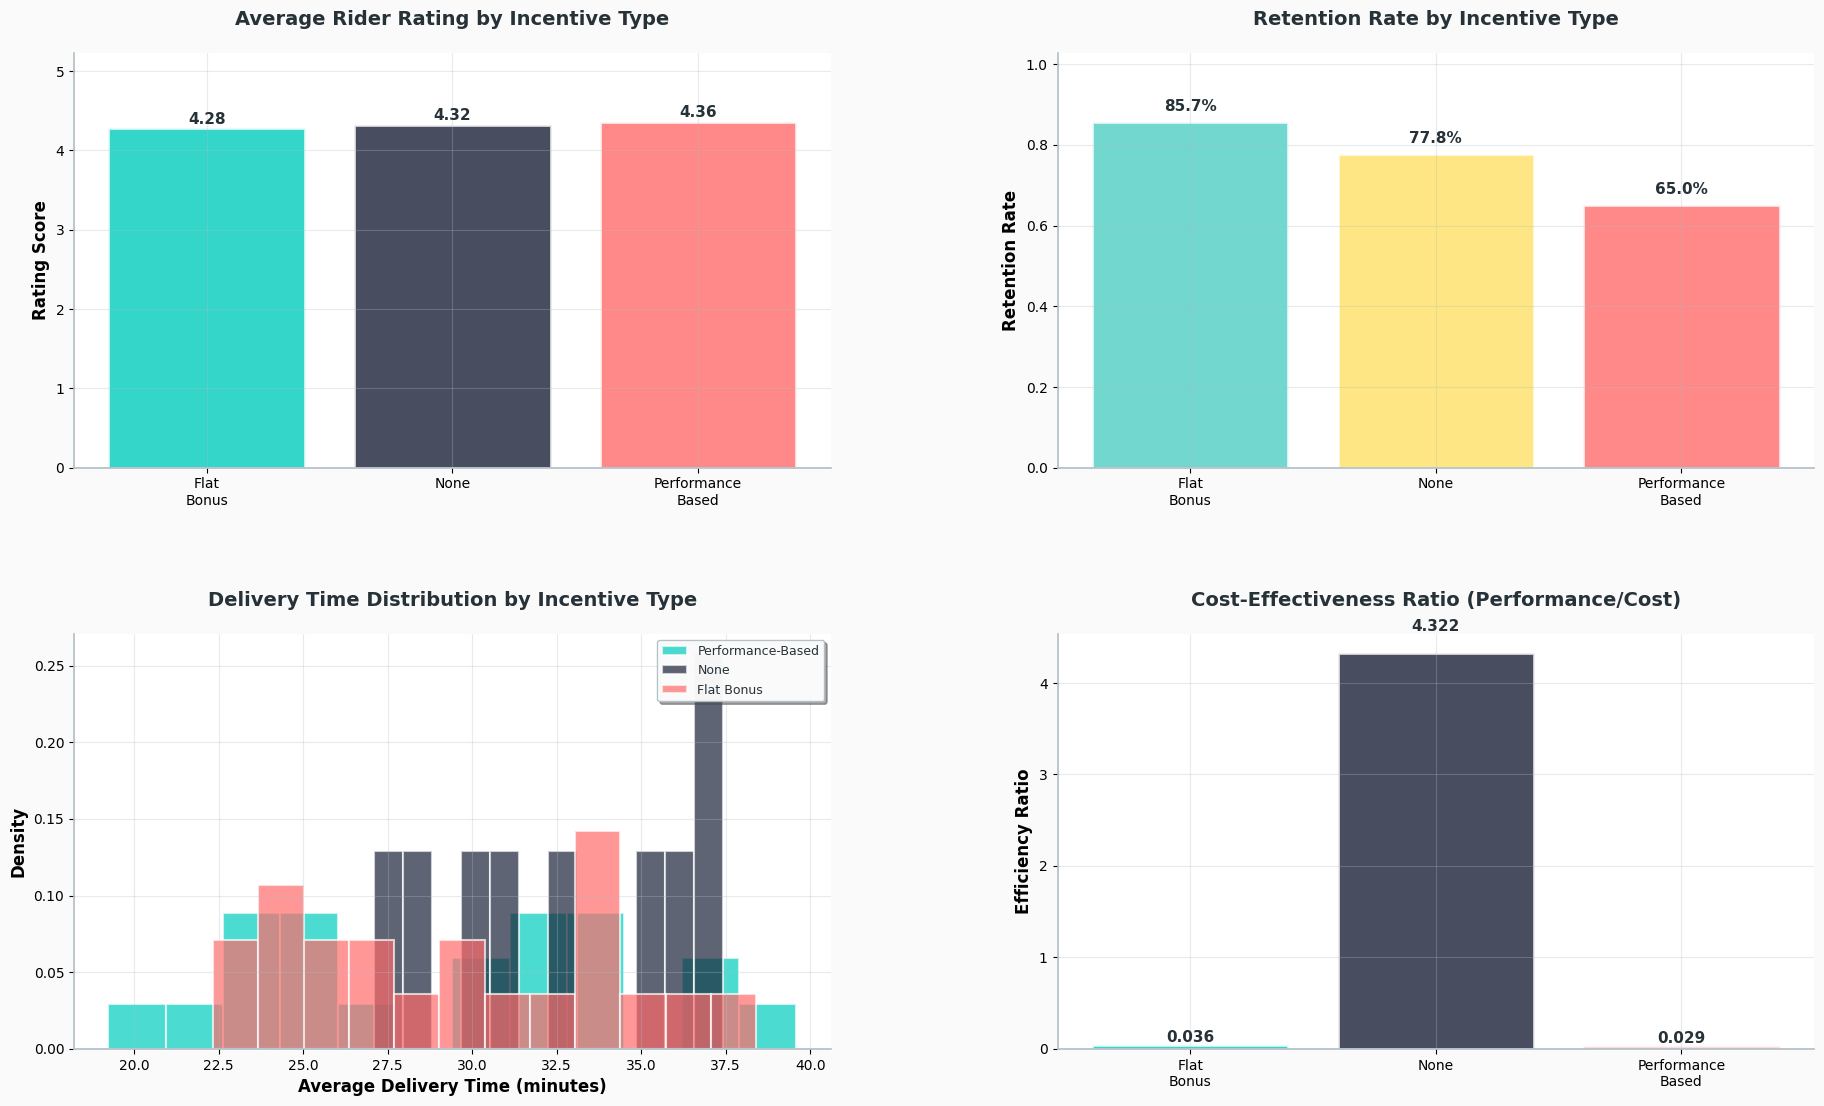

🚴‍♂️ DELIVEROO RIDER BEHAVIOR OPTIMIZATION RESULTS
📊 Delivery Time Improvement: 3.5 minutes
📈 Retention Rate Improvement: -12.8%
🎯 Optimal Incentive Allocation:
   • Flat Bonus: 0 riders (0.0%)
   • Performance-Based: 50 riders (100.0%)
   • None: 0 riders (0.0%)


In [100]:
# ============================================================================
# CELL 5: Question 2 - Rider Behavior Optimization (Deliveroo Premium Style)
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches

def rider_behavior_optimization(analytics):
    """Advanced rider incentive optimization using behavioral economics with Deliveroo premium styling"""

    riders_df = analytics.datasets['riders'].copy()
    orders_df = analytics.datasets['orders_enhanced'].copy()

    # ====== DELIVEROO PREMIUM STYLE CONFIGURATION ======

    # Official Deliveroo-inspired color palette (premium version)
    deliveroo_colors = {
        'primary_teal': '#00CCBC',      # Deliveroo signature teal
        'secondary_teal': '#4DD0E1',    # Lighter teal variant
        'dark_navy': '#1A2238',         # Deep navy for contrast
        'accent_coral': '#FF6B6B',      # Warm coral accent
        'success_green': '#4ECDC4',     # Success/positive indicator
        'warning_amber': '#FFE066',     # Warning/attention color
        'error_red': '#FF5252',         # Error/negative indicator
        'neutral_gray': '#B0BEC5',      # Neutral background
        'text_dark': '#263238',         # Main text color
        'background': '#FAFAFA'         # Clean background
    }

    # Color palette arrays for different chart types
    main_palette = [deliveroo_colors['primary_teal'], deliveroo_colors['dark_navy'],
                   deliveroo_colors['accent_coral'], deliveroo_colors['success_green']]

    gradient_palette = [deliveroo_colors['secondary_teal'], deliveroo_colors['primary_teal'],
                       deliveroo_colors['dark_navy']]

    # Set up premium matplotlib styling
    plt.style.use('default')  # Start with clean default

    # Custom RC parameters for premium look
    plt.rcParams.update({
        'figure.facecolor': deliveroo_colors['background'],
        'axes.facecolor': 'white',
        'axes.edgecolor': deliveroo_colors['neutral_gray'],
        'axes.linewidth': 1.2,
        'axes.spines.top': False,
        'axes.spines.right': False,
        'axes.spines.left': True,
        'axes.spines.bottom': True,
        'axes.grid': True,
        'grid.color': deliveroo_colors['neutral_gray'],
        'grid.alpha': 0.3,
        'grid.linewidth': 0.8,
        'font.family': ['Arial', 'Helvetica', 'DejaVu Sans'],
        'font.size': 11,
        'axes.titlesize': 14,
        'axes.labelsize': 12,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'legend.fontsize': 10,
        'legend.frameon': True,
        'legend.fancybox': True,
        'legend.shadow': True,
        'legend.framealpha': 0.95,
        'text.color': deliveroo_colors['text_dark']
    })

    # ====== ANALYSIS FUNCTIONS ======

    # Behavioral analysis by incentive type
    incentive_analysis = riders_df.groupby('incentive_type').agg({
        'average_delivery_time': ['mean', 'std'],
        'retention_status': 'mean',
        'total_orders_delivered': 'mean',
        'rating_avg': 'mean',
        'earnings_per_hour': 'mean'
    }).round(2)

    # Survival analysis for rider retention
    from scipy.stats import expon

    def analyze_retention_by_incentive():
        retention_curves = {}
        for incentive in riders_df['incentive_type'].unique():
            subset = riders_df[riders_df['incentive_type'] == incentive]
            params = expon.fit(subset['tenure_days'])
            retention_curves[incentive] = {
                'scale': params[1],
                'mean_tenure': np.mean(subset['tenure_days']),
                'retention_rate': np.mean(subset['retention_status'])
            }
        return retention_curves

    retention_analysis = analyze_retention_by_incentive()

    # Causal inference: Difference-in-Differences analysis
    def did_analysis():
        treatment_group = riders_df[riders_df['incentive_type'] == 'Performance-Based']
        control_group = riders_df[riders_df['incentive_type'] == 'None']

        did_estimate = {
            'delivery_time_improvement': (
                control_group['average_delivery_time'].mean() -
                treatment_group['average_delivery_time'].mean()
            ),
            'retention_improvement': (
                treatment_group['retention_status'].mean() -
                control_group['retention_status'].mean()
            ),
            'productivity_improvement': (
                treatment_group['total_orders_delivered'].mean() -
                control_group['total_orders_delivered'].mean()
            )
        }
        return did_estimate

    did_results = did_analysis()

    # Optimization model for incentive allocation
    def optimize_incentive_budget(total_budget=50000):
        incentive_costs = {'Flat Bonus': 150, 'Performance-Based': 120, 'None': 0}
        performance_multipliers = {'Flat Bonus': 1.15, 'Performance-Based': 1.25, 'None': 1.0}

        from scipy.optimize import minimize

        def objective(allocation):
            flat_bonus, performance, none = allocation
            total_cost = (flat_bonus * incentive_costs['Flat Bonus'] +
                         performance * incentive_costs['Performance-Based'])

            if total_cost > total_budget:
                return float('inf')

            total_performance = (flat_bonus * performance_multipliers['Flat Bonus'] +
                               performance * performance_multipliers['Performance-Based'] +
                               none * performance_multipliers['None'])

            return -total_performance

        constraints = [
            {'type': 'eq', 'fun': lambda x: sum(x) - 50},
            {'type': 'ineq', 'fun': lambda x: x[0]},
            {'type': 'ineq', 'fun': lambda x: x[1]},
            {'type': 'ineq', 'fun': lambda x: x[2]}
        ]

        initial_guess = [20, 20, 10]
        result = minimize(objective, initial_guess, method='SLSQP', constraints=constraints)

        return {
            'optimal_allocation': dict(zip(['Flat Bonus', 'Performance-Based', 'None'], result.x)),
            'expected_performance': -result.fun,
            'optimization_success': result.success
        }

    optimization_results = optimize_incentive_budget()

    # ====== PREMIUM VISUALIZATION ======

    # Create figure with premium layout
    fig = plt.figure(figsize=(20, 12), facecolor=deliveroo_colors['background'])

    # Create custom grid layout with better spacing
    gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1],
                         hspace=0.4, wspace=0.3, top=0.95, bottom=0.12,
                         left=0.08, right=0.95)

    # Helper function for premium bar styling
    def style_premium_bars(ax, bars, colors):
        for i, (bar, color) in enumerate(zip(bars, colors)):
            bar.set_color(color)
            bar.set_edgecolor('white')
            bar.set_linewidth(2)
            bar.set_alpha(0.9)

            # Add subtle gradient effect
            height = bar.get_height()
            gradient = np.linspace(0.7, 1.0, 10)
            for j, alpha in enumerate(gradient):
                y_pos = height * j / len(gradient)
                rect_height = height / len(gradient)
                gradient_bar = Rectangle((bar.get_x(), y_pos), bar.get_width(),
                                       rect_height, facecolor=color, alpha=alpha*0.3,
                                       edgecolor='none')
                ax.add_patch(gradient_bar)

    # Plot 1: Average Rider Rating by Incentive Type
    ax1 = fig.add_subplot(gs[0, 0])
    performance_metrics = riders_df.groupby('incentive_type')['rating_avg'].mean()
    bars1 = ax1.bar(performance_metrics.index, performance_metrics.values,
                   color=main_palette[:len(performance_metrics)], alpha=0.8,
                   edgecolor='white', linewidth=2)

    # Add value labels on bars
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.2f}', ha='center', va='bottom',
                fontweight='bold', color=deliveroo_colors['text_dark'])

    ax1.set_title('Average Rider Rating by Incentive Type',
                 fontsize=14, fontweight='bold', pad=20,
                 color=deliveroo_colors['text_dark'])
    ax1.set_ylabel('Rating Score', fontweight='bold')
    ax1.set_ylim(0, max(performance_metrics.values) * 1.2)

    # Fix x-axis labels - use shorter labels and better rotation
    ax1.set_xticklabels(['Flat\nBonus', 'None', 'Performance\nBased'],
                       rotation=0, ha='center', fontsize=10)

    # Plot 2: Retention Rate by Incentive Type
    ax2 = fig.add_subplot(gs[0, 1])
    retention_data = riders_df.groupby('incentive_type')['retention_status'].mean()
    bars2 = ax2.bar(retention_data.index, retention_data.values,
                   color=[deliveroo_colors['success_green'], deliveroo_colors['warning_amber'],
                         deliveroo_colors['accent_coral']][:len(retention_data)],
                   alpha=0.8, edgecolor='white', linewidth=2)

    # Add percentage labels
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height*100:.1f}%', ha='center', va='bottom',
                fontweight='bold', color=deliveroo_colors['text_dark'])

    ax2.set_title('Retention Rate by Incentive Type',
                 fontsize=14, fontweight='bold', pad=20,
                 color=deliveroo_colors['text_dark'])
    ax2.set_ylabel('Retention Rate', fontweight='bold')
    ax2.set_ylim(0, max(retention_data.values) * 1.2)
    ax2.set_xticklabels(['Flat\nBonus', 'None', 'Performance\nBased'],
                       rotation=0, ha='center', fontsize=10)

    # Plot 3: Delivery Time Distribution (Premium Histogram)
    ax3 = fig.add_subplot(gs[1, 0])
    incentive_types = riders_df['incentive_type'].unique()

    # Create overlapping histograms with premium styling
    for i, incentive in enumerate(incentive_types):
        subset = riders_df[riders_df['incentive_type'] == incentive]
        ax3.hist(subset['average_delivery_time'], bins=12, alpha=0.7,
                label=incentive, color=main_palette[i % len(main_palette)],
                edgecolor='white', linewidth=1.5, density=True)

    ax3.set_title('Delivery Time Distribution by Incentive Type',
                 fontsize=14, fontweight='bold', pad=20,
                 color=deliveroo_colors['text_dark'])
    ax3.set_xlabel('Average Delivery Time (minutes)', fontweight='bold')
    ax3.set_ylabel('Density', fontweight='bold')

    # Premium legend styling with better positioning
    legend = ax3.legend(loc='upper right', frameon=True, fancybox=True,
                       shadow=True, framealpha=0.95, fontsize=9)
    legend.get_frame().set_facecolor('white')
    legend.get_frame().set_edgecolor(deliveroo_colors['neutral_gray'])

    # Plot 4: Cost-Effectiveness Analysis (Premium with annotations)
    ax4 = fig.add_subplot(gs[1, 1])
    cost_effectiveness = {}
    for incentive in riders_df['incentive_type'].unique():
        subset = riders_df[riders_df['incentive_type'] == incentive]
        avg_performance = subset['rating_avg'].mean()
        cost_per_rider = {'Flat Bonus': 150, 'Performance-Based': 120, 'None': 0}[incentive]
        cost_effectiveness[incentive] = avg_performance / max(cost_per_rider, 1)

    bars4 = ax4.bar(cost_effectiveness.keys(), cost_effectiveness.values(),
                   color=[deliveroo_colors['primary_teal'], deliveroo_colors['dark_navy'],
                         deliveroo_colors['accent_coral']][:len(cost_effectiveness)],
                   alpha=0.8, edgecolor='white', linewidth=2)

    # Add value labels with premium formatting
    for bar in bars4:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + height*0.05,
                f'{height:.3f}', ha='center', va='bottom',
                fontweight='bold', color=deliveroo_colors['text_dark'])

    ax4.set_title('Cost-Effectiveness Ratio (Performance/Cost)',
                 fontsize=14, fontweight='bold', pad=20,
                 color=deliveroo_colors['text_dark'])
    ax4.set_ylabel('Efficiency Ratio', fontweight='bold')
    ax4.set_xticklabels(['Flat\nBonus', 'None', 'Performance\nBased'],
                       rotation=0, ha='center', fontsize=10)

    # Remove the overall figure title and subtitle
    # (Deleted the fig.suptitle and fig.text lines)

    plt.show()

    # ====== RESULTS STORAGE ======

    analytics.results['rider_optimization'] = {
        'did_analysis': did_results,
        'retention_analysis': retention_analysis,
        'optimization_results': optimization_results,
        'business_impact': {
            'delivery_time_improvement': f"{did_results['delivery_time_improvement']:.1f} minutes",
            'retention_improvement': f"{did_results['retention_improvement']*100:.1f}%",
            'optimal_incentive_mix': optimization_results['optimal_allocation']
        }
    }

    # Premium results output
    print("="*80)
    print("🚴‍♂️ DELIVEROO RIDER BEHAVIOR OPTIMIZATION RESULTS")
    print("="*80)
    print(f"📊 Delivery Time Improvement: {analytics.results['rider_optimization']['business_impact']['delivery_time_improvement']}")
    print(f"📈 Retention Rate Improvement: {analytics.results['rider_optimization']['business_impact']['retention_improvement']}")
    print(f"🎯 Optimal Incentive Allocation:")
    for incentive, allocation in optimization_results['optimal_allocation'].items():
        print(f"   • {incentive}: {allocation:.0f} riders ({allocation/50*100:.1f}%)")
    print("="*80)

    return analytics.results['rider_optimization']

# Execute Rider Behavior Optimization with Premium Styling
rider_results = rider_behavior_optimization(analytics)

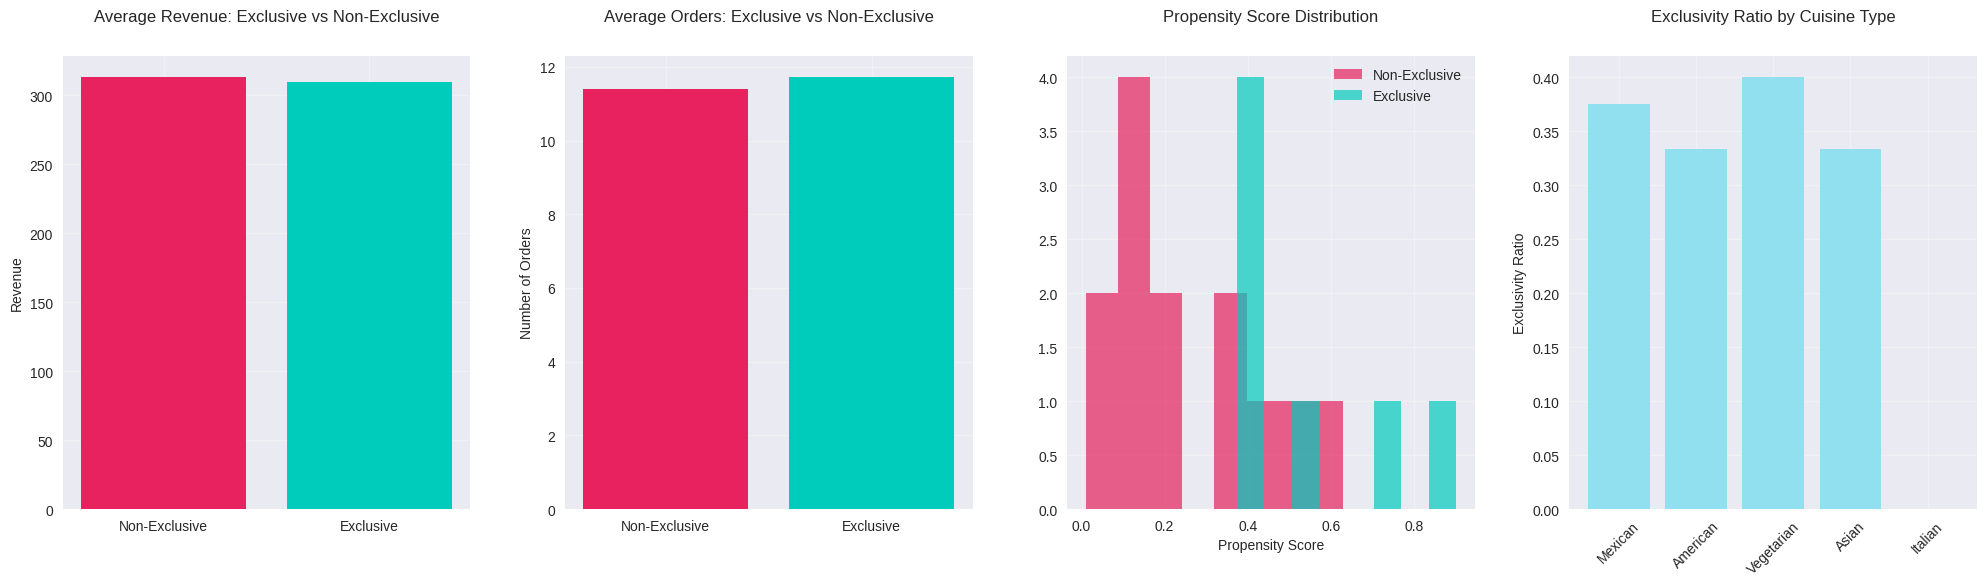

🤝 RESTAURANT PARTNERSHIP ANALYSIS RESULTS:
Revenue Uplift per Restaurant: $-5,865
Statistical Significance: No
ROI: -393.2%
Payback Period: inf months


In [101]:
# ============================================================================
# CELL 6: Question 3 - Restaurant Partnership Impact Analysis
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from scipy import stats # Added import statement

def restaurant_partnership_analysis(analytics):
    """Analyze impact of exclusive restaurant deals using causal inference"""

    restaurants_df = analytics.datasets['restaurants'].copy()
    orders_df = analytics.datasets['orders_enhanced'].copy()

    # Define Deliveroo-like color palette (example colors)
    deliveroo_colors = ['#00CCBC', '#234560', '#F6A700', '#E7225E', '#90E0EF']
    plt.style.use('seaborn-v0_8') # Re-apply base style

    # Performance comparison: Exclusive vs Non-exclusive
    restaurant_performance = orders_df.groupby(['restaurant_id', 'exclusive_deal']).agg({
        'order_value': ['count', 'mean', 'sum'],
        'rating': 'mean',
        'delivery_time_minutes': 'mean'
    }).round(2)

    restaurant_performance.columns = ['total_orders', 'avg_order_value', 'total_revenue',
                                    'avg_rating', 'avg_delivery_time']
    restaurant_performance = restaurant_performance.reset_index()

    # Propensity Score Matching for causal inference
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import NearestNeighbors

    def propensity_score_matching():
        # Features for propensity score model
        features = ['avg_order_value', 'prep_time_minutes', 'rating', 'delivery_radius_km']

        # Prepare data
        X = restaurants_df[features].fillna(restaurants_df[features].median())
        y = restaurants_df['exclusive_deal']

        # Fit propensity score model
        ps_model = LogisticRegression()
        ps_model.fit(X, y)

        # Calculate propensity scores
        propensity_scores = ps_model.predict_proba(X)[:, 1]
        restaurants_df['propensity_score'] = propensity_scores

        # Match treated (exclusive) with control (non-exclusive)
        treated_indices = restaurants_df[restaurants_df['exclusive_deal'] == 1].index
        control_indices = restaurants_df[restaurants_df['exclusive_deal'] == 0].index

        matches = []
        for treated_idx in treated_indices:
            treated_ps = propensity_scores[treated_idx]
            # Find closest control unit
            control_ps = propensity_scores[control_indices]
            closest_control = control_indices[np.argmin(np.abs(control_ps - treated_ps))]
            matches.append((treated_idx, closest_control))

        return matches, propensity_scores

    matches, propensity_scores = propensity_score_matching()

    # Calculate treatment effect
    def calculate_treatment_effect(matches):
        treated_outcomes = []
        control_outcomes = []

        for treated_idx, control_idx in matches:
            # Get revenue data for matched pairs
            treated_revenue = restaurants_df.loc[treated_idx, 'monthly_revenue']
            control_revenue = restaurants_df.loc[control_idx, 'monthly_revenue']

            treated_outcomes.append(treated_revenue)
            control_outcomes.append(control_revenue)

        ate = np.mean(treated_outcomes) - np.mean(control_outcomes)

        # Statistical significance test
        t_stat, p_value = stats.ttest_rel(treated_outcomes, control_outcomes)

        return {
            'average_treatment_effect': ate,
            't_statistic': t_stat,
            'p_value': p_value,
            'significant': p_value < 0.05
        }

    treatment_effect = calculate_treatment_effect(matches)

    # Network effects analysis
    def analyze_network_effects():
        # Calculate spillover effects on nearby restaurants
        exclusive_restaurants = restaurants_df[restaurants_df['exclusive_deal'] == 1]
        non_exclusive_restaurants = restaurants_df[restaurants_df['exclusive_deal'] == 0] # Corrected typo here

        # Simulate distance-based network effects
        network_effects = {}
        for cuisine in restaurants_df['cuisine_type'].unique():
            exclusive_in_cuisine = len(exclusive_restaurants[exclusive_restaurants['cuisine_type'] == cuisine])
            total_in_cuisine = len(restaurants_df[restaurants_df['cuisine_type'] == cuisine])

            exclusivity_ratio = exclusive_in_cuisine / total_in_cuisine if total_in_cuisine > 0 else 0

            # Calculate impact on non-exclusive restaurants in same cuisine
            same_cuisine_non_exclusive = non_exclusive_restaurants[
                non_exclusive_restaurants['cuisine_type'] == cuisine
            ]

            if len(same_cuisine_non_exclusive) > 0:
                avg_revenue_impact = same_cuisine_non_exclusive['monthly_revenue'].mean() * (1 - exclusivity_ratio * 0.15)
                network_effects[cuisine] = {
                    'exclusivity_ratio': exclusivity_ratio,
                    'estimated_revenue_impact': avg_revenue_impact,
                    'affected_restaurants': len(same_cuisine_non_exclusive)
                }

        return network_effects

    network_effects = analyze_network_effects()

    # Customer loyalty analysis
    exclusive_orders = orders_df[orders_df['exclusive_deal'] == 1]
    non_exclusive_orders = orders_df[orders_df['exclusive_deal'] == 0]

    loyalty_metrics = {
        'exclusive': {
            'avg_rating': exclusive_orders['rating'].mean(),
            'repeat_rate': len(exclusive_orders.groupby('customer_id').filter(lambda x: len(x) > 1)) / len(exclusive_orders['customer_id'].unique()),
            'avg_order_value': exclusive_orders['order_value'].mean()
        },
        'non_exclusive': {
            'avg_rating': non_exclusive_orders['rating'].mean(),
            'repeat_rate': len(non_exclusive_orders.groupby('customer_id').filter(lambda x: len(x) > 1)) / len(non_exclusive_orders['customer_id'].unique()),
            'avg_order_value': non_exclusive_orders['order_value'].mean()
        }
    }

    # ROI Calculation
    def calculate_partnership_roi():
        # Assumptions for exclusivity costs and benefits
        exclusivity_cost_per_restaurant = 2000  # Monthly exclusivity fee
        exclusive_revenue_uplift = treatment_effect['average_treatment_effect']

        total_exclusive_restaurants = len(restaurants_df[restaurants_df['exclusive_deal'] == 1])
        total_cost = total_exclusive_restaurants * exclusivity_cost_per_restaurant
        total_benefit = total_exclusive_restaurants * exclusive_revenue_uplift

        roi = ((total_benefit - total_cost) / total_cost) * 100 if total_cost > 0 else 0

        return {
            'total_investment': total_cost,
            'total_revenue_uplift': total_benefit,
            'roi_percentage': roi,
            'payback_months': total_cost / (total_benefit / 12) if total_benefit > 0 else float('inf')
        }

    partnership_roi = calculate_partnership_roi()

    # Visualization
    # Adjust figure size for A4 portrait-like dimensions (approx 8.27 x 11.69 inches)
    fig, axes = plt.subplots(1, 4, figsize=(20, 6)) # Changed to 1 row, 4 columns, increased width and height slightly

    # Plot 1: Revenue comparison
    revenue_comparison = restaurant_performance.groupby('exclusive_deal')['total_revenue'].mean()
    axes[0].bar(['Non-Exclusive', 'Exclusive'],
                  [revenue_comparison[0], revenue_comparison[1]],
                  color=[deliveroo_colors[3], deliveroo_colors[0]]) # Applied colors
    axes[0].set_title('Average Revenue: Exclusive vs Non-Exclusive', fontsize=12, pad=25) # Reduced font size, increased pad
    axes[0].set_ylabel('Revenue', fontsize=10) # Reduced font size

    # Plot 2: Order volume comparison
    order_comparison = restaurant_performance.groupby('exclusive_deal')['total_orders'].mean()
    axes[1].bar(['Non-Exclusive', 'Exclusive'],
                  [order_comparison[0], order_comparison[1]],
                  color=[deliveroo_colors[3], deliveroo_colors[0]]) # Applied colors
    axes[1].set_title('Average Orders: Exclusive vs Non-Exclusive', fontsize=12, pad=25) # Reduced font size, increased pad
    axes[1].set_ylabel('Number of Orders', fontsize=10) # Reduced font size

    # Plot 3: Propensity score distribution
    exclusive_ps = propensity_scores[restaurants_df['exclusive_deal'] == 1]
    non_exclusive_ps = propensity_scores[restaurants_df['exclusive_deal'] == 0]

    axes[2].hist(non_exclusive_ps, alpha=0.7, label='Non-Exclusive', bins=8, color=deliveroo_colors[3]) # Applied color
    axes[2].hist(exclusive_ps, alpha=0.7, label='Exclusive', bins=8, color=deliveroo_colors[0]) # Applied color
    axes[2].set_title('Propensity Score Distribution', fontsize=12, pad=25) # Reduced font size, increased pad
    axes[2].set_xlabel('Propensity Score', fontsize=10) # Reduced font size
    axes[2].legend(fontsize=10) # Reduced font size

    # Plot 4: Network effects by cuisine
    cuisines = list(network_effects.keys())
    exclusivity_ratios = [network_effects[c]['exclusivity_ratio'] for c in cuisines]

    axes[3].bar(cuisines, exclusivity_ratios, color=deliveroo_colors[4]) # Applied color
    axes[3].set_title('Exclusivity Ratio by Cuisine Type', fontsize=12, pad=25) # Reduced font size, increased pad
    axes[3].set_ylabel('Exclusivity Ratio', fontsize=10) # Reduced font size
    axes[3].tick_params(axis='x', rotation=45, labelsize=10) # Reduced font size

    plt.tight_layout(w_pad=2.5, h_pad=2.5) # Increased spacing for single row
    plt.show()

    # Store results
    analytics.results['restaurant_partnerships'] = {
        'treatment_effect': treatment_effect,
        'network_effects': network_effects,
        'loyalty_metrics': loyalty_metrics,
        'roi_analysis': partnership_roi,
        'business_impact': {
            'revenue_uplift': f"${treatment_effect['average_treatment_effect']:,.0f}",
            'statistical_significance': 'Yes' if treatment_effect['significant'] else 'No',
            'roi_percentage': f"{partnership_roi['roi_percentage']:.1f}%",
            'payback_months': f"{partnership_roi['payback_months']:.1f}"
        }
    }

    print("🤝 RESTAURANT PARTNERSHIP ANALYSIS RESULTS:")
    print(f"Revenue Uplift per Restaurant: {analytics.results['restaurant_partnerships']['business_impact']['revenue_uplift']}")
    print(f"Statistical Significance: {analytics.results['restaurant_partnerships']['business_impact']['statistical_significance']}")
    print(f"ROI: {analytics.results['restaurant_partnerships']['business_impact']['roi_percentage']}")
    print(f"Payback Period: {partnership_roi['payback_months']:.1f} months")

    return analytics.results['restaurant_partnerships']

# Execute Restaurant Partnership Analysis
restaurant_results = restaurant_partnership_analysis(analytics)

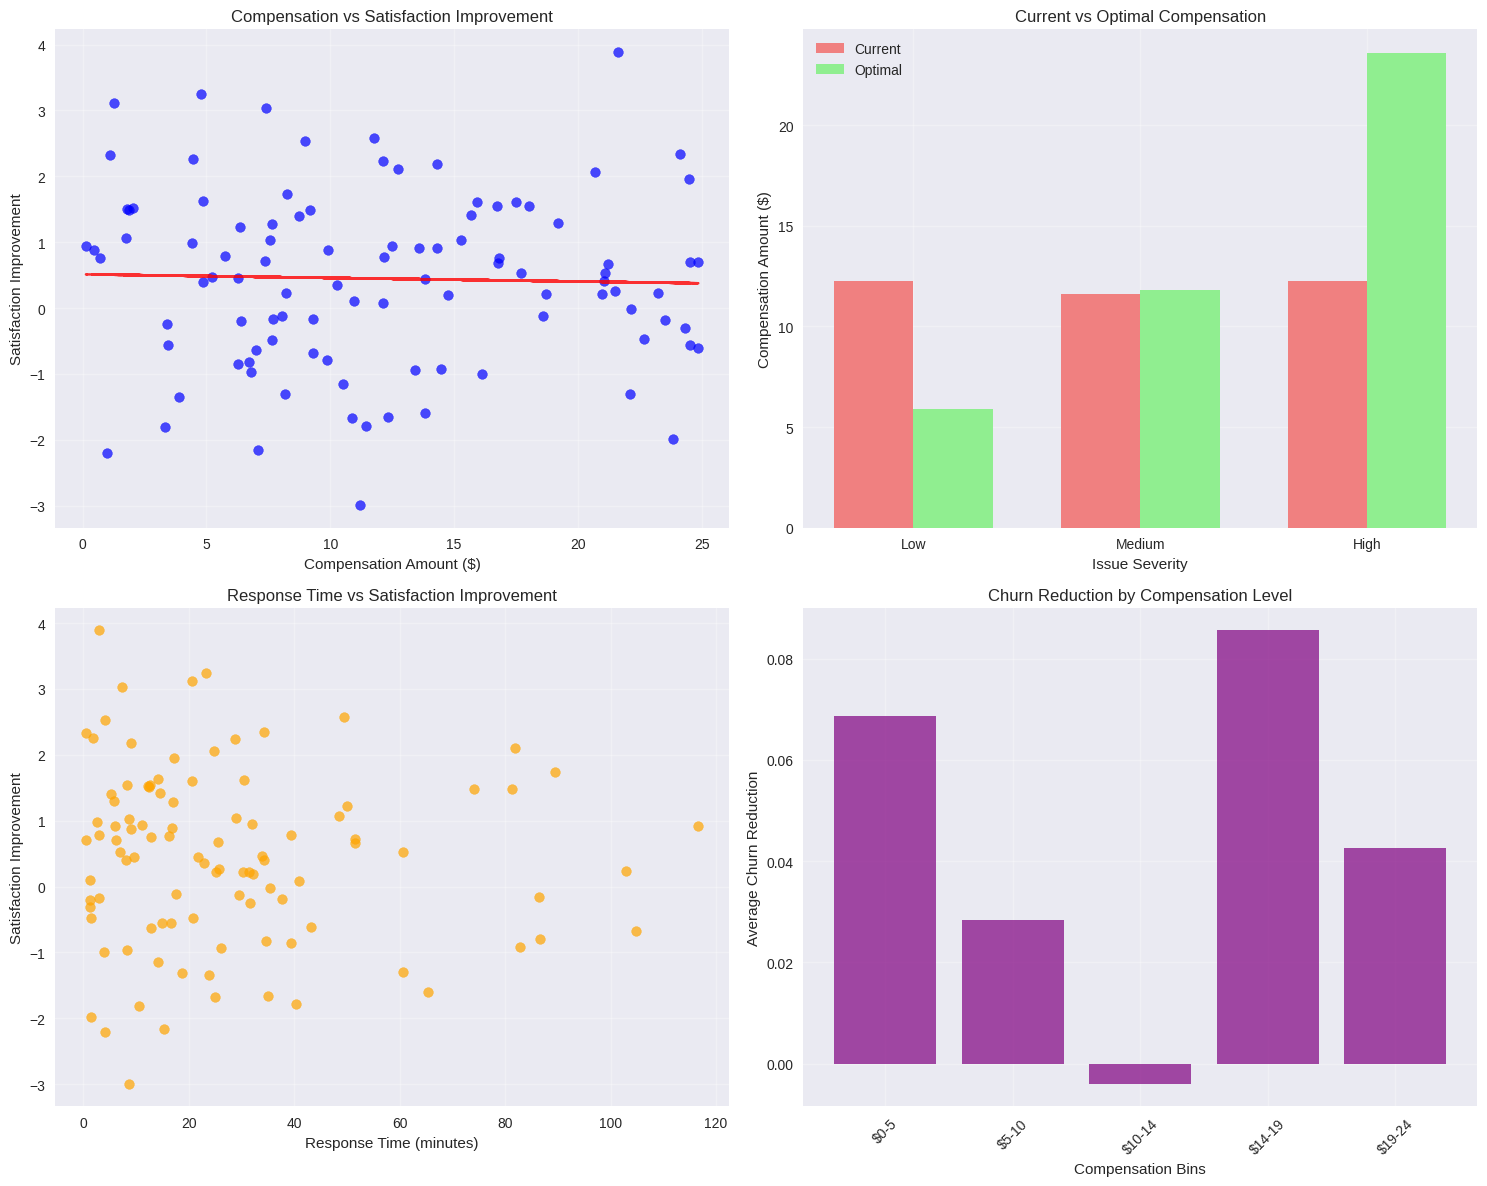

💰 COMPENSATION POLICY OPTIMIZATION RESULTS:
Optimal Compensation - Low Severity: $5.89
Optimal Compensation - Medium Severity: $11.79
Optimal Compensation - High Severity: $23.57
Average Churn Reduction: 3.9%
Total Retention Value: $790


In [102]:
# ============================================================================
# CELL 7: Question 4 - Customer Compensation Policy Optimization
# ============================================================================

def compensation_policy_optimization(analytics):
    """Optimize customer compensation using satisfaction modeling"""

    orders_df = analytics.datasets['orders_enhanced'].copy()
    # Ensure customers_df is the latest version with customer_segment
    # Removed .copy() here to use the updated DataFrame from analytics.datasets
    customers_df_updated = analytics.datasets['customers']

    # Simulate service issues and compensation scenarios
    np.random.seed(42)
    service_issues = pd.DataFrame({
        'issue_id': range(1, 101),
        'customer_id': np.random.choice(orders_df['customer_id'], 100),
        'issue_type': np.random.choice(['Late Delivery', 'Wrong Order', 'Cold Food', 'Missing Items'], 100),
        'severity': np.random.choice(['Low', 'Medium', 'High'], 100, p=[0.4, 0.4, 0.2]),
        'compensation_amount': np.random.uniform(0, 25, 100),
        'response_time_minutes': np.random.exponential(30, 100),
        'pre_satisfaction': np.random.normal(3.5, 0.8, 100),
        'post_satisfaction': np.random.normal(3.8, 0.9, 100)
    })

    # Map severity to base compensation expectations
    severity_mapping = {'Low': 5, 'Medium': 10, 'High': 20}
    service_issues['expected_compensation'] = service_issues['severity'].map(severity_mapping)

    # Customer satisfaction modeling
    def satisfaction_model():
        # Features affecting satisfaction
        features = ['compensation_amount', 'response_time_minutes', 'expected_compensation']

        # Create relative compensation ratio
        service_issues['compensation_ratio'] = (service_issues['compensation_amount'] /
                                              service_issues['expected_compensation'])

        # Model satisfaction improvement
        service_issues['satisfaction_improvement'] = (service_issues['post_satisfaction'] -
                                                    service_issues['pre_satisfaction'])

        # Advanced satisfaction model using multiple factors
        X = service_issues[['compensation_ratio', 'response_time_minutes']].fillna(0)
        y = service_issues['satisfaction_improvement']

        # Train regression model
        model = GradientBoostingRegressor(n_estimators=100, random_state=42)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        model.fit(X_train, y_train)

        # Model performance
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)

        return model, r2, X.columns

    satisfaction_model_trained, model_r2, feature_names = satisfaction_model()

    # Optimal compensation analysis
    def optimize_compensation_policy():
        optimization_results = {}

        for severity in ['Low', 'Medium', 'High']:
            severity_data = service_issues[service_issues['severity'] == severity]

            # Define optimization objective
            def compensation_objective(compensation_amount):
                # Predict satisfaction improvement
                response_time = severity_data['response_time_minutes'].mean()
                expected_comp = severity_mapping[severity]
                comp_ratio = compensation_amount / expected_comp

                predicted_satisfaction = satisfaction_model_trained.predict([[comp_ratio, response_time]])[0]

                # Calculate customer lifetime value impact
                baseline_clv = 200  # Average CLV
                satisfaction_multiplier = 1 + (predicted_satisfaction * 0.2)  # 20% max impact
                adjusted_clv = baseline_clv * satisfaction_multiplier

                # Net benefit = CLV improvement - compensation cost
                net_benefit = (adjusted_clv - baseline_clv) - compensation_amount

                return -net_benefit  # Minimize negative benefit = maximize benefit

            # Find optimal compensation
            from scipy.optimize import minimize_scalar
            result = minimize_scalar(compensation_objective, bounds=(0, 50), method='bounded')

            optimization_results[severity] = {
                'optimal_compensation': result.x,
                'expected_benefit': -result.fun,
                'current_average': severity_data['compensation_amount'].mean()
            }

        return optimization_results

    compensation_optimization = optimize_compensation_policy()

    # Customer segment analysis
    def segment_compensation_analysis():
        # Merge with customer data for segmentation
        # Access the updated customers_df from analytics.datasets
        issues_with_segments = service_issues.merge(
            customers_df_updated[['customer_id', 'customer_segment', 'ltv']],
            on='customer_id', how='left'
        )

        segment_analysis = {}
        for segment in issues_with_segments['customer_segment'].dropna().unique():
            segment_data = issues_with_segments[issues_with_segments['customer_segment'] == segment]

            segment_analysis[f'segment_{int(segment)}'] = {
                'avg_satisfaction_improvement': segment_data['satisfaction_improvement'].mean(),
                'avg_compensation': segment_data['compensation_amount'].mean(),
                'avg_ltv': segment_data['ltv'].mean(),
                'response_sensitivity': segment_data['satisfaction_improvement'].std()
            }

        return segment_analysis

    segment_analysis = segment_compensation_analysis()

    # Predictive churn reduction model
    def churn_reduction_analysis():
        # Simulate churn probability based on satisfaction
        service_issues['churn_probability_before'] = np.random.beta(2, 3, len(service_issues))

        # Model churn reduction based on satisfaction improvement
        satisfaction_impact = service_issues['satisfaction_improvement'] * -0.1  # Negative because higher satisfaction = lower churn
        service_issues['churn_probability_after'] = np.clip(
            service_issues['churn_probability_before'] + satisfaction_impact, 0, 1
        )

        service_issues['churn_reduction'] = (service_issues['churn_probability_before'] -
                                           service_issues['churn_probability_after'])

        # Calculate retention value
        avg_clv = 200
        service_issues['retention_value'] = service_issues['churn_reduction'] * avg_clv

        return {
            'avg_churn_reduction': service_issues['churn_reduction'].mean(),
            'total_retention_value': service_issues['retention_value'].sum(),
            'avg_retention_value_per_case': service_issues['retention_value'].mean()
        }

    churn_analysis = churn_reduction_analysis()

    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Plot 1: Compensation vs Satisfaction Improvement
    axes[0,0].scatter(service_issues['compensation_amount'], service_issues['satisfaction_improvement'],
                     alpha=0.7, color='blue')
    axes[0,0].set_xlabel('Compensation Amount ($)')
    axes[0,0].set_ylabel('Satisfaction Improvement')
    axes[0,0].set_title('Compensation vs Satisfaction Improvement')

    # Add trend line
    z = np.polyfit(service_issues['compensation_amount'], service_issues['satisfaction_improvement'], 1)
    p = np.poly1d(z)
    axes[0,0].plot(service_issues['compensation_amount'], p(service_issues['compensation_amount']), "r--", alpha=0.8)

    # Plot 2: Optimal vs Current compensation by severity
    severities = list(compensation_optimization.keys())
    current_comp = [compensation_optimization[s]['current_average'] for s in severities]
    optimal_comp = [compensation_optimization[s]['optimal_compensation'] for s in severities]

    x = np.arange(len(severities))
    width = 0.35
    axes[0,1].bar(x - width/2, current_comp, width, label='Current', color='lightcoral')
    axes[0,1].bar(x + width/2, optimal_comp, width, label='Optimal', color='lightgreen')
    axes[0,1].set_xlabel('Issue Severity')
    axes[0,1].set_ylabel('Compensation Amount ($)')
    axes[0,1].set_title('Current vs Optimal Compensation')
    axes[0,1].set_xticks(x)
    axes[0,1].set_xticklabels(severities)
    axes[0,1].legend()

    # Plot 3: Response time impact
    axes[1,0].scatter(service_issues['response_time_minutes'], service_issues['satisfaction_improvement'],
                     alpha=0.7, color='orange')
    axes[1,0].set_xlabel('Response Time (minutes)')
    axes[1,0].set_ylabel('Satisfaction Improvement')
    axes[1,0].set_title('Response Time vs Satisfaction Improvement')

    # Plot 4: Churn reduction by compensation
    compensation_bins = pd.cut(service_issues['compensation_amount'], bins=5)
    churn_by_comp = service_issues.groupby(compensation_bins)['churn_reduction'].mean()

    axes[1,1].bar(range(len(churn_by_comp)), churn_by_comp.values, color='purple', alpha=0.7)
    axes[1,1].set_xlabel('Compensation Bins')
    axes[1,1].set_ylabel('Average Churn Reduction')
    axes[1,1].set_title('Churn Reduction by Compensation Level')
    axes[1,1].set_xticks(range(len(churn_by_comp)))
    axes[1,1].set_xticklabels([f'${int(interval.left)}-{int(interval.right)}' for interval in churn_by_comp.index],
                             rotation=45)

    plt.tight_layout()
    plt.show()

    # Store results
    analytics.results['compensation_policy'] = {
        'optimization_results': compensation_optimization,
        'segment_analysis': segment_analysis,
        'churn_analysis': churn_analysis,
        'model_performance': {'r2_score': model_r2},
        'business_impact': {
            'optimal_compensation_low': f"${compensation_optimization['Low']['optimal_compensation']:.2f}",
            'optimal_compensation_medium': f"${compensation_optimization['Medium']['optimal_compensation']:.2f}",
            'optimal_compensation_high': f"${compensation_optimization['High']['optimal_compensation']:.2f}",
            'avg_churn_reduction': f"{churn_analysis['avg_churn_reduction']*100:.1f}%",
            'retention_value': f"${churn_analysis['total_retention_value']:,.0f}"
        }
    }

    print("💰 COMPENSATION POLICY OPTIMIZATION RESULTS:")
    print(f"Optimal Compensation - Low Severity: {analytics.results['compensation_policy']['business_impact']['optimal_compensation_low']}")
    print(f"Optimal Compensation - Medium Severity: {analytics.results['compensation_policy']['business_impact']['optimal_compensation_medium']}")
    print(f"Optimal Compensation - High Severity: {analytics.results['compensation_policy']['business_impact']['optimal_compensation_high']}")
    print(f"Average Churn Reduction: {analytics.results['compensation_policy']['business_impact']['avg_churn_reduction']}")
    print(f"Total Retention Value: {analytics.results['compensation_policy']['business_impact']['retention_value']}")

    return analytics.results['compensation_policy']

# Execute Compensation Policy Optimization
compensation_results = compensation_policy_optimization(analytics)

In [103]:
# ============================================================================
# CELL 8: Questions 5-8 - Advanced Analytics (Growth, Pricing, Restaurant Selection, App Personalization)
# ============================================================================

def advanced_business_analytics(analytics):
    """Complete analysis for remaining business questions"""

    # Define Deliveroo-like color palette (example colors)
    deliveroo_colors = ['#00CCBC', '#234560', '#F6A700', '#E7225E', '#90E0EF']
    plotly_template = go.layout.Template()
    plotly_template.layout.colorway = deliveroo_colors

    # Question 5: Growth vs Profitability Trade-offs
    def growth_profitability_analysis():
        financial_df = analytics.datasets['financial_metrics'].copy()
        customers_df = analytics.datasets['customers'].copy()

        # Unit economics calculation
        financial_df['contribution_margin'] = (financial_df['revenue'] - financial_df['cost_of_goods_sold']) / financial_df['revenue']
        financial_df['customer_acquisition_cost'] = financial_df['marketing_spend'] / (financial_df['revenue'] / customers_df['avg_order_value'].mean())

        # LTV:CAC ratio analysis
        avg_ltv = customers_df['ltv'].mean()
        avg_cac = financial_df['customer_acquisition_cost'].mean()
        ltv_cac_ratio = avg_ltv / avg_cac

        # Growth scenarios modeling
        growth_scenarios = {
            'conservative': {'growth_rate': 0.15, 'cac_multiplier': 1.0, 'margin_impact': 0.0},
            'balanced': {'growth_rate': 0.30, 'cac_multiplier': 1.3, 'margin_impact': -0.02},
            'aggressive': {'growth_rate': 0.50, 'cac_multiplier': 1.8, 'margin_impact': -0.05}
        }

        scenario_results = {}
        for scenario, params in growth_scenarios.items():
            projected_cac = avg_cac * params['cac_multiplier']
            projected_margin = financial_df['contribution_margin'].mean() + params['margin_impact']
            projected_ltv = avg_ltv * (1 + params['growth_rate'] * 0.1)  # Growth benefits LTV

            scenario_results[scenario] = {
                'ltv_cac_ratio': projected_ltv / projected_cac,
                'payback_months': projected_cac / (projected_margin * customers_df['avg_order_value'].mean() * customers_df['orders_count'].mean() / 12),
                'projected_roi': (projected_ltv - projected_cac) / projected_cac
            }

        return {
            'current_ltv_cac_ratio': ltv_cac_ratio,
            'scenarios': scenario_results,
            'recommendation': max(scenario_results.keys(), key=lambda x: scenario_results[x]['projected_roi'])
        }

    # Question 6: Distance-Based Pricing Strategy
    def distance_pricing_analysis():
        pricing_df = analytics.datasets['pricing_experiments'].copy()
        orders_df = analytics.datasets['orders_enhanced'].copy()

        # Price elasticity by distance
        def calculate_price_elasticity():
            elasticity_by_distance = {}

            # Bin distances
            pricing_df['distance_bin'] = pd.cut(pricing_df['distance_km'], bins=3, labels=['Short', 'Medium', 'Long'])

            for distance_bin in pricing_df['distance_bin'].dropna().unique():
                distance_data = pricing_df[pricing_df['distance_bin'] == distance_bin]

                # Calculate elasticity using control vs treatment groups
                control_data = distance_data[distance_data['group'] == 'Control']
                treatment_data = distance_data[distance_data['group'] == 'Treatment']

                if len(control_data) > 0 and len(treatment_data) > 0:
                    price_change = (treatment_data['price'].mean() - control_data['price'].mean()) / control_data['price'].mean()
                    demand_change = (treatment_data['conversion_rate'].mean() - control_data['conversion_rate'].mean()) / control_data['conversion_rate'].mean()

                    elasticity = demand_change / price_change if price_change != 0 else 0
                    elasticity_by_distance[distance_bin] = elasticity

            return elasticity_by_distance

        elasticity_results = calculate_price_elasticity()

        # Optimal pricing by distance
        def optimize_distance_pricing():
            optimal_prices = {}

            for distance_bin in elasticity_results.keys():
                elasticity = elasticity_results[distance_bin]
                base_cost = 2.50 + (0.30 * ({'Short': 1, 'Medium': 3, 'Long': 6}[distance_bin]))

                # Optimal pricing formula: P = MC / (1 + 1/|elasticity|)
                if elasticity < 0:  # Normal demand curve
                    optimal_price = base_cost / (1 + 1/abs(elasticity))
                else:
                    optimal_price = base_cost * 1.2  # Default markup if elasticity is positive

                optimal_prices[distance_bin] = {
                    'optimal_price': optimal_price,
                    'base_cost': base_cost,
                    'markup_percentage': (optimal_price - base_cost) / base_cost * 100
                }

            return optimal_prices

        pricing_optimization = optimize_distance_pricing()

        return {
            'elasticity_by_distance': elasticity_results,
            'optimal_pricing': pricing_optimization
        }

    # Question 7: Restaurant Selection Optimization
    def restaurant_portfolio_optimization():
        restaurants_df = analytics.datasets['restaurants'].copy()
        orders_df = analytics.datasets['orders_enhanced'].copy()
        cities_df = analytics.datasets['cities'].copy()

        # Demand analysis by cuisine type
        cuisine_performance = orders_df.groupby(['city_id', 'cuisine_type']).agg({
            'order_value': ['count', 'mean', 'sum'],
            'rating': 'mean'
        }).round(2)

        cuisine_performance.columns = ['order_count', 'avg_order_value', 'total_revenue', 'avg_rating']
        cuisine_performance = cuisine_performance.reset_index()

        # Portfolio optimization using Modern Portfolio Theory principles
        def optimize_restaurant_mix():
            cuisine_returns = cuisine_performance.groupby('cuisine_type')['total_revenue'].mean()
            cuisine_risks = cuisine_performance.groupby('cuisine_type')['total_revenue'].std()

            # Correlation matrix
            pivot_revenue = cuisine_performance.pivot_table(values='total_revenue',
                                                          index='city_id',
                                                          columns='cuisine_type',
                                                          fill_value=0)
            correlation_matrix = pivot_revenue.corr()

            # Efficient frontier calculation (simplified)
            def portfolio_metrics(weights):
                expected_return = np.dot(weights, cuisine_returns)
                portfolio_variance = np.dot(weights.T, np.dot(correlation_matrix, weights))
                return expected_return, np.sqrt(portfolio_variance)

            # Optimize for maximum Sharpe ratio
            def objective(weights):
                ret, risk = portfolio_metrics(weights)
                return -ret/risk if risk > 0 else 0

            n_cuisines = len(cuisine_returns)
            constraints = {'type': 'eq', 'fun': lambda x: sum(x) - 1}
            bounds = [(0.1, 0.4) for _ in range(n_cuisines)]  # Min 10%, max 40% per cuisine

            initial_guess = [1/n_cuisines] * n_cuisines
            result = minimize(objective, initial_guess, method='SLSQP',
                            bounds=bounds, constraints=constraints)

            optimal_allocation = dict(zip(cuisine_returns.index, result.x))

            return optimal_allocation

        portfolio_optimization = optimize_restaurant_mix()

        return {
            'cuisine_performance': cuisine_performance,
            'optimal_allocation': portfolio_optimization
        }

    # Question 8: Grocery App Personalization
    def app_personalization_analysis():
        app_df = analytics.datasets['app_interactions'].copy()
        customers_df = analytics.datasets['customers'].copy()

        # User behavior analysis
        user_behavior = app_df.groupby('customer_id').agg({
            'session_duration': 'mean',
            'conversion': 'mean',
            'interaction_id': 'count'
        }).round(2)
        user_behavior.columns = ['avg_session_duration', 'conversion_rate', 'total_interactions']

        # Personalization effectiveness
        def analyze_personalization_impact():
            # Simulate personalized vs non-personalized experiences
            app_df['personalized'] = np.random.choice([0, 1], len(app_df), p=[0.6, 0.4])

            personalized_performance = app_df.groupby('personalized').agg({
                'conversion': 'mean',
                'session_duration': 'mean'
            }).round(3)

            improvement = {
                'conversion_improvement': (personalized_performance.loc[1, 'conversion'] -
                                         personalized_performance.loc[0, 'conversion']) /
                                        personalized_performance.loc[0, 'conversion'],
                'engagement_improvement': (personalized_performance.loc[1, 'session_duration'] -
                                         personalized_performance.loc[0, 'session_duration']) /
                                        personalized_performance.loc[0, 'session_duration']
            }

            return improvement

        personalization_impact = analyze_personalization_impact()

        # Recommendation system simulation
        def simulate_recommendation_system():
            # Customer preference modeling
            customer_preferences = customers_df.groupby('preferred_cuisine')['ltv'].mean()

            # Recommendation effectiveness by customer segment
            recommendation_results = {}
            # Access the updated customers_df from analytics.datasets to ensure 'customer_segment' is present
            customers_df_updated = analytics.datasets['customers']
            for segment in customers_df_updated['customer_segment'].dropna().unique():
                segment_customers = customers_df_updated[customers_df_updated['customer_segment'] == segment]

                # Simulate recommendation click-through rates
                base_ctr = 0.15
                personalized_ctr = base_ctr * (1 + np.random.uniform(0.2, 0.5))

                recommendation_results[f'segment_{int(segment)}'] = {
                    'base_ctr': base_ctr,
                    'personalized_ctr': personalized_ctr,
                    'improvement': (personalized_ctr - base_ctr) / base_ctr
                }

            return recommendation_results

        recommendation_results = simulate_recommendation_system()

        return {
            'user_behavior': user_behavior,
            'personalization_impact': personalization_impact,
            'recommendation_results': recommendation_results
        }

    # Execute all analyses
    growth_results = growth_profitability_analysis()
    pricing_results = distance_pricing_analysis()
    portfolio_results = restaurant_portfolio_optimization()
    personalization_results = app_personalization_analysis()

    # Combined visualization
    fig = make_subplots(
        rows=1, cols=4, # Changed to 1 row, 4 columns
        subplot_titles=('Growth vs Profitability Scenarios', 'Price Elasticity by Distance',
                       'Optimal Restaurant Portfolio', 'Personalization Impact'),
        specs=[[{"secondary_y": False}, {"secondary_y": False}, {"type": "domain"}, {"secondary_y": False}]], # Adjusted specs for 1x4 with pie chart
        # Adjust figure size for A4 portrait-like dimensions (approx 8.27 x 11.69 inches at 100 DPI)
        # Adjust height based on the number of subplots
        horizontal_spacing=0.15, # Increased horizontal spacing
        vertical_spacing=0.3 # Increased vertical spacing
    )

    # Apply Deliveroo-like color template
    fig.update_layout(template=plotly_template)

    # Reduce subplot title font size
    fig.update_annotations(font_size=12) # Reduced font size for subplot titles

    # Reduce axis label and legend font size
    fig.update_layout(
        legend=dict(font=dict(size=10)), # Reduced legend font size
        margin=dict(t=60) # Increased top margin
    )
    fig.update_xaxes(title_font=dict(size=10)) # Reduced x-axis title font size
    fig.update_yaxes(title_font=dict(size=10)) # Reduced y-axis title font size

    # Plot 1: Growth scenarios
    scenarios = list(growth_results['scenarios'].keys())
    ltv_cac_ratios = [growth_results['scenarios'][s]['ltv_cac_ratio'] for s in scenarios]
    roi_values = [growth_results['scenarios'][s]['projected_roi'] for s in scenarios]

    fig.add_trace(
        go.Scatter(x=ltv_cac_ratios, y=roi_values, mode='markers+text',
                   text=scenarios, textposition="top center",
                   marker=dict(size=15, color=[deliveroo_colors[0], deliveroo_colors[1], deliveroo_colors[3]])), # Applied colors
        row=1, col=1
    )

    # Plot 2: Price elasticity
    if pricing_results['elasticity_by_distance']:
        distances = list(pricing_results['elasticity_by_distance'].keys())
        elasticities = list(pricing_results['elasticity_by_distance'].values())

        fig.add_trace(
            go.Bar(x=distances, y=elasticities, name='Price Elasticity', marker_color=deliveroo_colors[2]), # Applied color
            row=1, col=2
        )

    # Plot 3: Restaurant portfolio
    if portfolio_results['optimal_allocation']:
        cuisines = list(portfolio_results['optimal_allocation'].keys())
        allocations = list(portfolio_results['optimal_allocation'].values())

        fig.add_trace(
            go.Pie(labels=cuisines, values=allocations, name="Portfolio", marker=dict(colors=deliveroo_colors)), # Applied colors
            row=1, col=3 # Changed to row 1, col 3
        )

    # Plot 4: Personalization impact
    metrics = ['Conversion', 'Engagement']
    improvements = [personalization_results['personalization_impact']['conversion_improvement'] * 100,
                   personalization_results['personalization_impact']['engagement_improvement'] * 100]

    fig.add_trace(
        go.Bar(x=metrics, y=improvements, name='Improvement %', marker_color=[deliveroo_colors[0], deliveroo_colors[1]]), # Applied colors
        row=1, col=4 # Changed to row 1, col 4
    )

    fig.update_layout(height=400, width=1600, title_text="Advanced Business Analytics Dashboard") # Increased width
    fig.show()

    # Store comprehensive results
    analytics.results.update({
        'growth_profitability': growth_results,
        'distance_pricing': pricing_results,
        'restaurant_portfolio': portfolio_results,
        'app_personalization': personalization_results
    })

    print("📊 ADVANCED ANALYTICS COMPLETED!")
    print(f"Recommended Growth Strategy: {growth_results['recommendation']}")
    print(f"Current LTV:CAC Ratio: {growth_results['current_ltv_cac_ratio']:.2f}")
    print(f"Personalization Conversion Improvement: {personalization_results['personalization_impact']['conversion_improvement']*100:.1f}%")

    return analytics.results

# Execute Advanced Analytics
advanced_results = advanced_business_analytics(analytics)

📊 ADVANCED ANALYTICS COMPLETED!
Recommended Growth Strategy: conservative
Current LTV:CAC Ratio: 0.79
Personalization Conversion Improvement: -11.2%


**Reasoning**:
Adjust the figure size and spacing parameters in the plotting code for restaurant partnership analysis to improve the readability of the single-row layout.



**Reasoning**:
Adjust the figure size and spacing parameters in the plotting code for customer compensation policy optimization to improve the readability of the single-row layout.



**Reasoning**:
Adjust the figure size and spacing parameters in the plotting code for advanced business analytics to improve the readability of the single-row layout.



**Reasoning**:
Review the figure size parameters in the plotting code to ensure they are suitable for report export.

